In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
import itertools
import requests

# Correlation S&P 500 weight change and Stocks Volatility
# Volatility of SP 500 constituents and SP 500

In [2]:
pip install --upgrade yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
def get_data(time_frame):
    '''
    Mind constituents update of S&P 500
    Importing ticker data and holdings data in S&P 500 index(SPY)
    '''
    import pandas as pd
    import yfinance as yf
    import datetime as dt
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

    tables = pd.read_html(url)
    sp500_table = tables[0]

    tickers = sp500_table['Symbol'].str.replace('.', '-').tolist()
    
    today = dt.date.today()
    n_years = (today - dt.timedelta(days=time_frame*365)).strftime('%Y-%m-%d')

    data_d = yf.download(tickers, start=n_years, end=today)

    close_price = pd.DataFrame(data_d['Close']).dropna(axis=1)
    close_price.index.names = ['date']
    
    return close_price, tickers, data_d, n_years, today

In [4]:
def get_data_stack(time_frame):
    '''
    Mind constituents update of S&P 500
    Importing ticker data and holdings data in S&P 500 index(SPY)
    '''
    import pandas as pd
    import yfinance as yf
    import datetime as dt
    
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

    tables = pd.read_html(url)
    sp500_table = tables[0]

    tickers = sp500_table['Symbol'].str.replace('.', '-').tolist()
    
    today = dt.date.today()
    n_years = (today - dt.timedelta(days=time_frame*365)).strftime('%Y-%m-%d')

    data_d = yf.download(tickers, start=n_years, end=today)

    close_price = pd.DataFrame(data_d['Close'].stack()).dropna(axis=1)
    close_price.index.names = ['date', 'ticker']
    close_price.columns = ['close price']
    
    return close_price

In [5]:
close_price, tickers, data_d, n_years, today = get_data(1/4)

[*********************100%%**********************]  503 of 503 completed


In [6]:
# file_name = 'close_price_1.xlsx'
# close_price.to_excel(file_name)
# print('DataFrame is written to Excel File successfully.')

In [7]:
# Replace column name to stock ticker for convenience of indexing, then transpose,
# so that row label is the ticker, with columns being dates
close_price.rename(columns={'Close': tickers}, inplace=True)
# print(close_price['NVDA'])
close_price_t = close_price.T
# print(close_price_t)

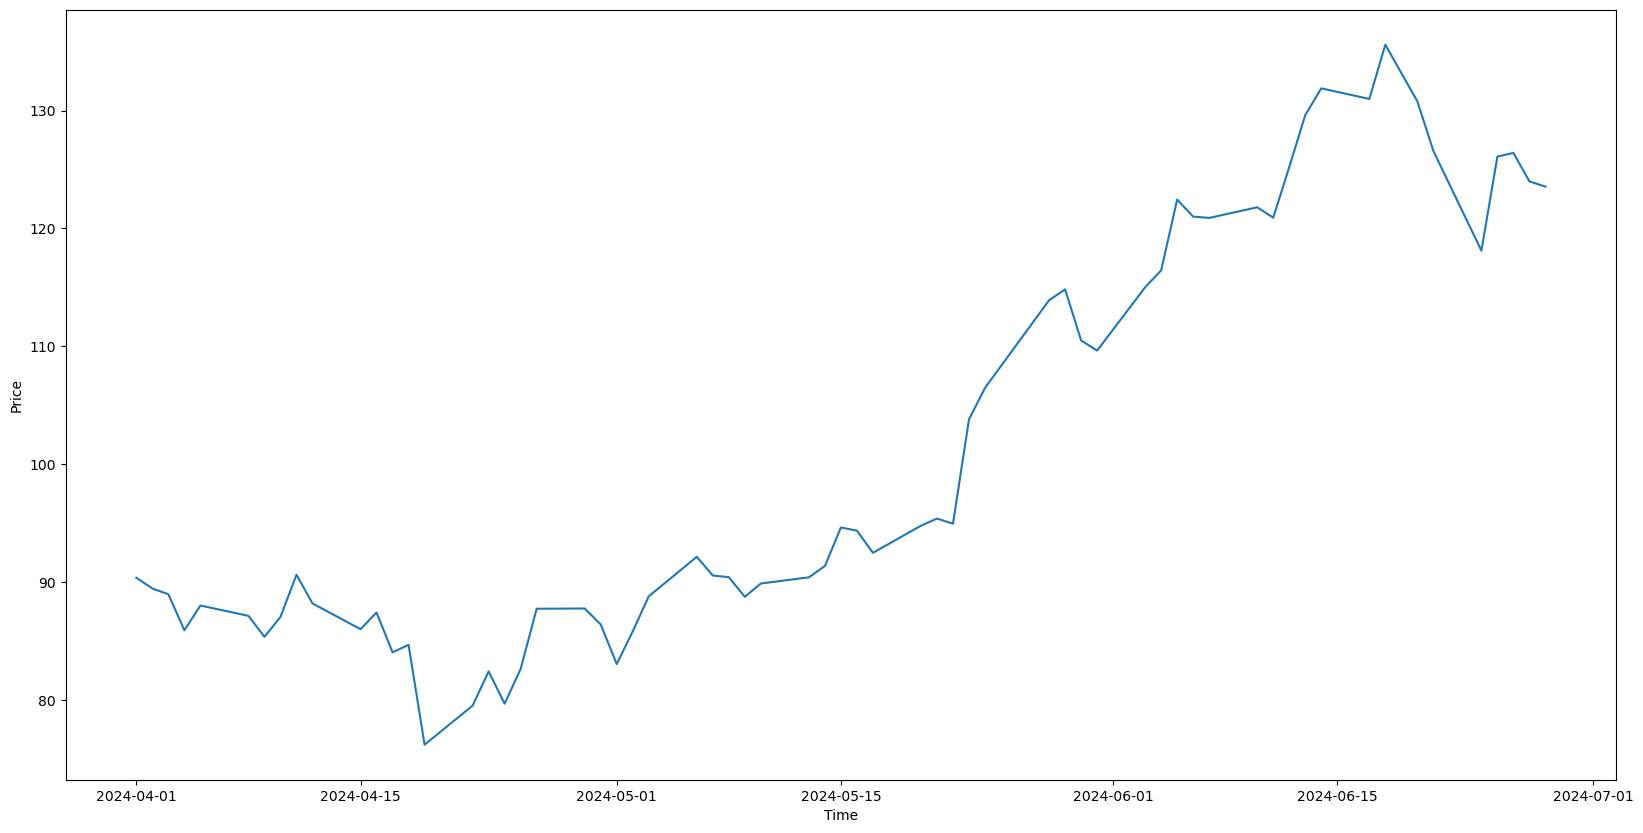

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(close_price['NVDA'].T)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [9]:
# Turning pandas dataframe into python list, to zip into a dictionary.
close_prices = close_price.values.tolist()
# print(close_prices)
# np.array(close_prices[0]).shape

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


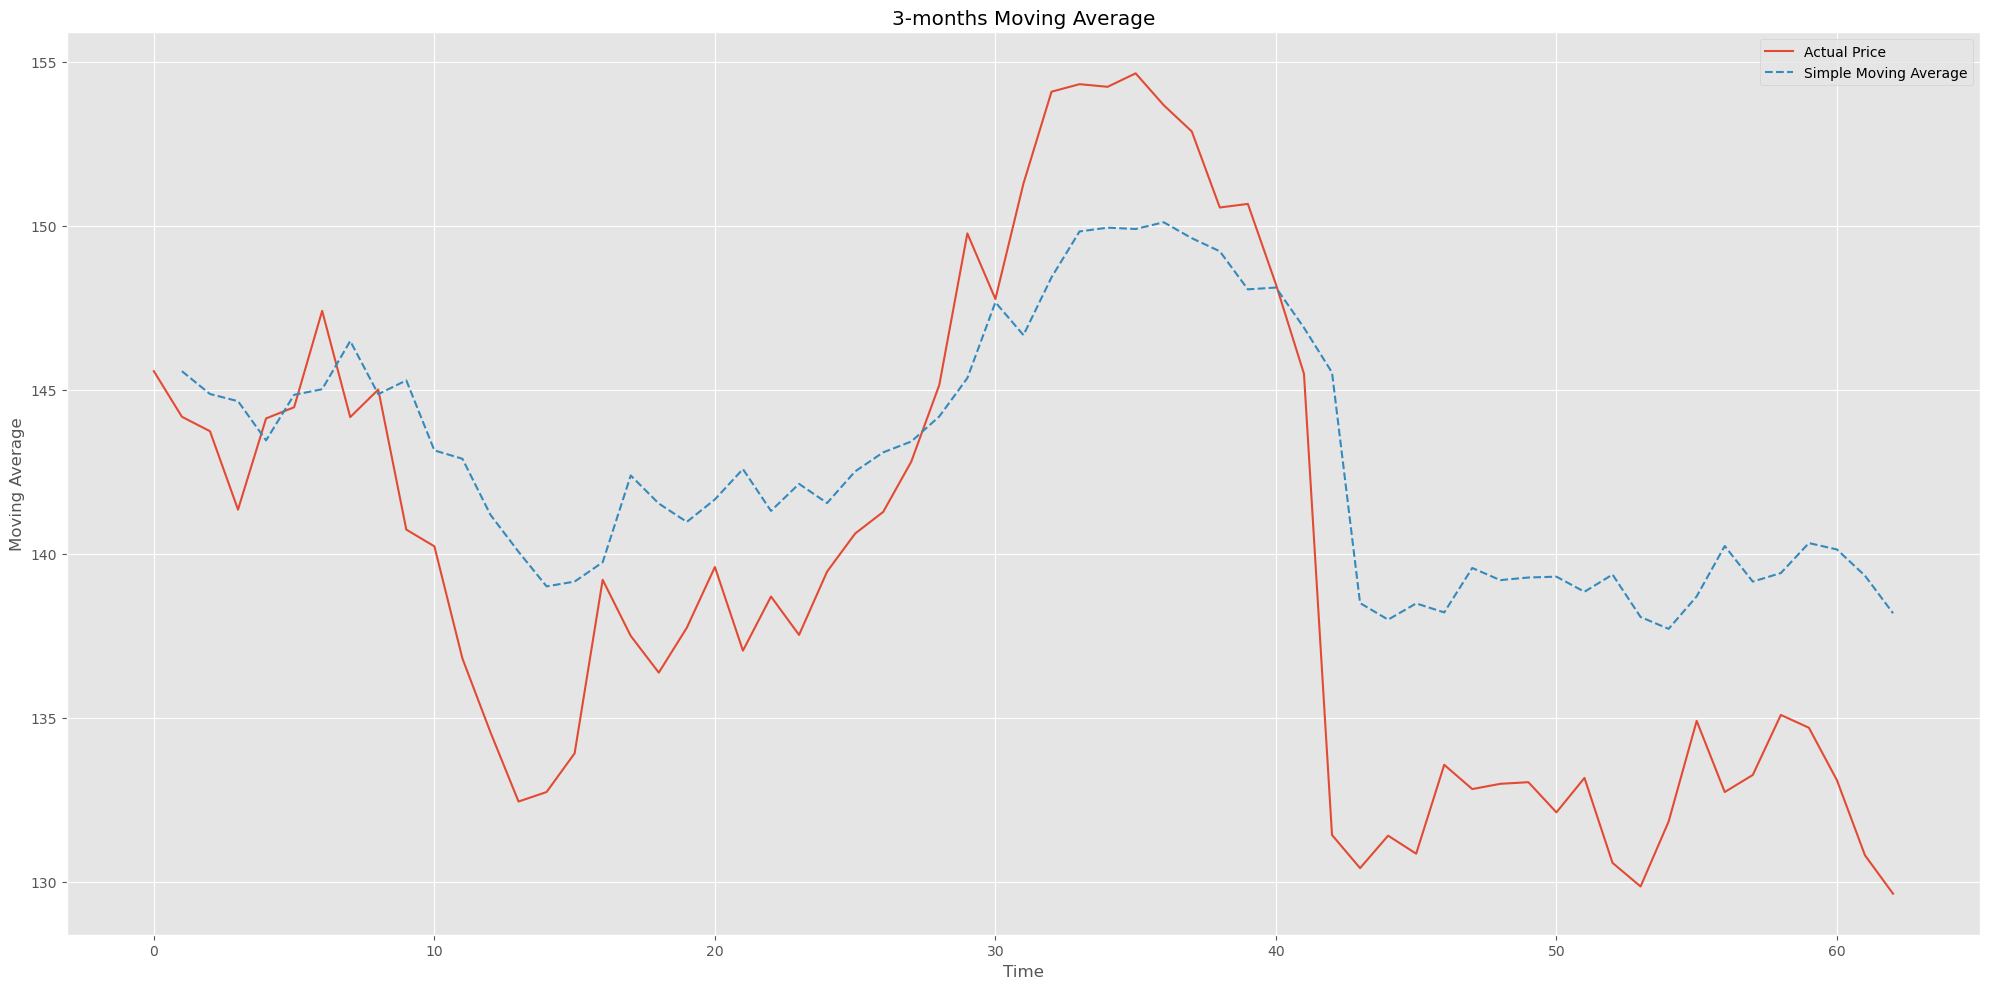

In [10]:
# Simple Moving Average

close_prices = close_price_t.values.tolist()

sma = []
for i in pd.Series(close_prices[0]):
    for j in pd.Series(close_prices[0]).shift(1):
        sma.append((i + j) / 2)
    break
# ma = pd.Series(ma).dropna().tolist()
# print(ma)

print(plt.style.available)

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(close_prices[0], label='Actual Price')
plt.plot(sma, linestyle='--', label='Simple Moving Average')
plt.xlabel('Time')
plt.ylabel('Moving Average')
plt.title('3-months Moving Average')
plt.legend()
plt.tight_layout()
plt.show()
# (pd.Series(close_prices[0][0]) + (pd.Series(close_prices[0]).shift(-1)[0])) / 2

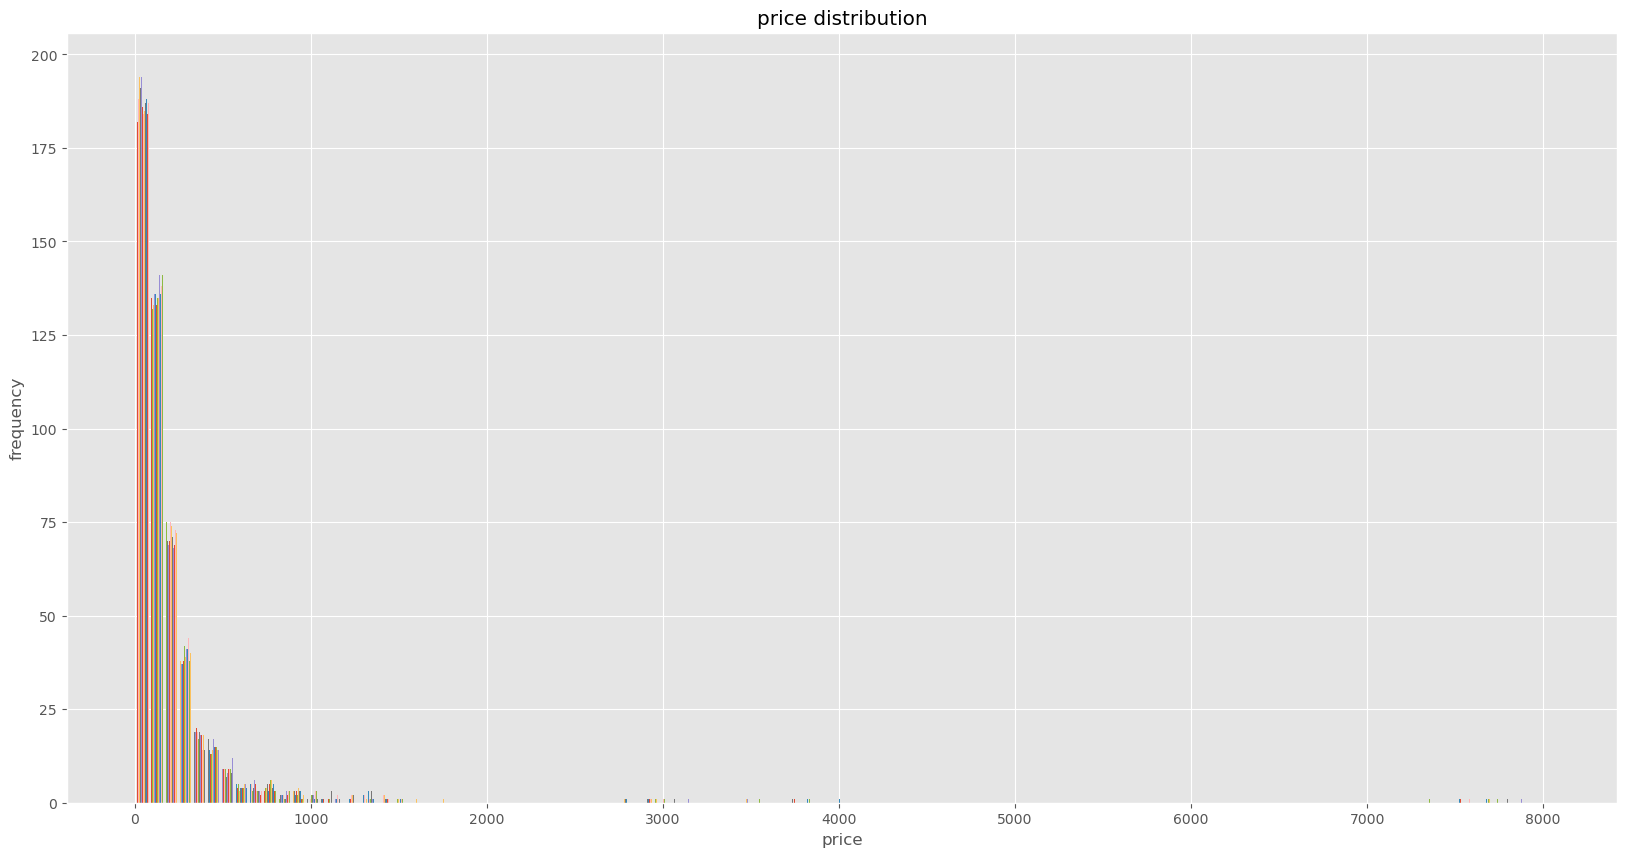

In [11]:
plt.figure(figsize=(20, 10))
plt.hist(np.array(close_prices), bins=100)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('price distribution')
plt.show()

In [12]:
# Create dictionary with ticker and prices list
close_p = {}
for key in tickers:
    for value in close_prices:
        close_p[key] = value
        close_prices.remove(value)
        break
# print(close_p)

In [13]:
close_prices = close_price_t.values.tolist()
# print(close_prices)

# Log Price

In [14]:
log_p = np.log(close_prices)
print(log_p)

[[4.98058836 4.97099315 4.96793651 ... 4.89102556 4.87366946 4.86468428]
 [2.73501664 2.66722818 2.65042108 ... 2.40874528 2.42303122 2.42745407]
 [5.13597488 5.1289515  5.13373746 ... 5.36246519 5.36644322 5.35005554]
 ...
 [4.86560952 4.85569542 4.86761133 ... 4.68314923 4.68564354 4.68702662]
 [5.70711026 5.69204722 5.679319   ... 5.72723853 5.72681514 5.73311469]
 [5.11811359 5.10600604 5.09356614 ... 5.14107855 5.17309426 5.15537036]]


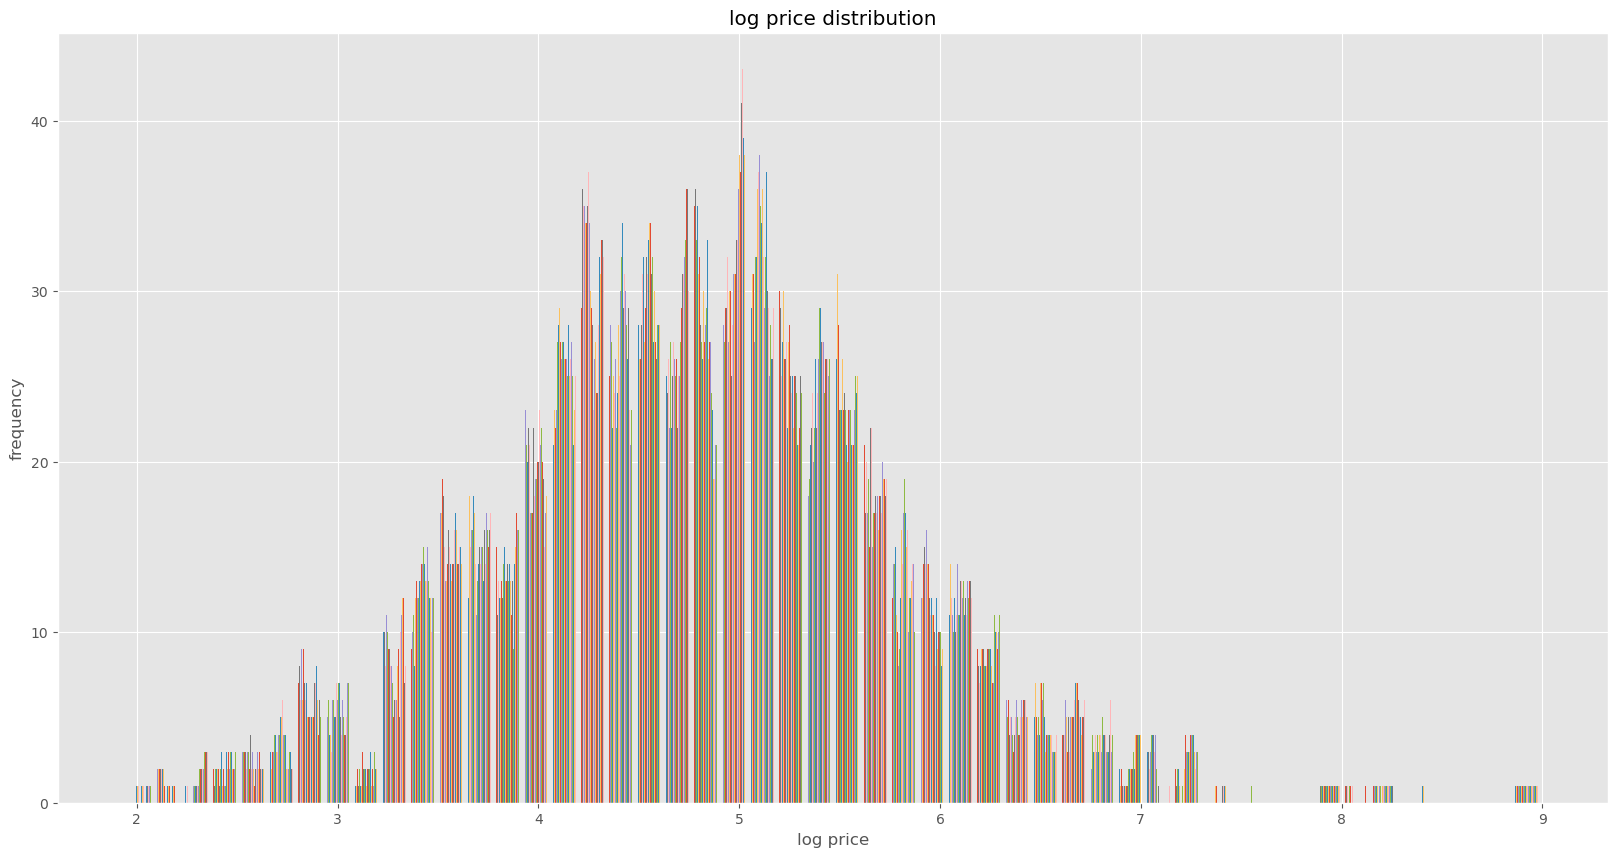

In [15]:
plt.figure(figsize=(20, 10))
plt.hist(log_p, bins=50)
plt.xlabel('log price')
plt.ylabel('frequency')
plt.title('log price distribution')
plt.show()

# Log Return

In [16]:
pd_p = pd.DataFrame(close_prices)

log_ret = np.log(pd_p.T / pd_p.T.shift(1)).dropna()

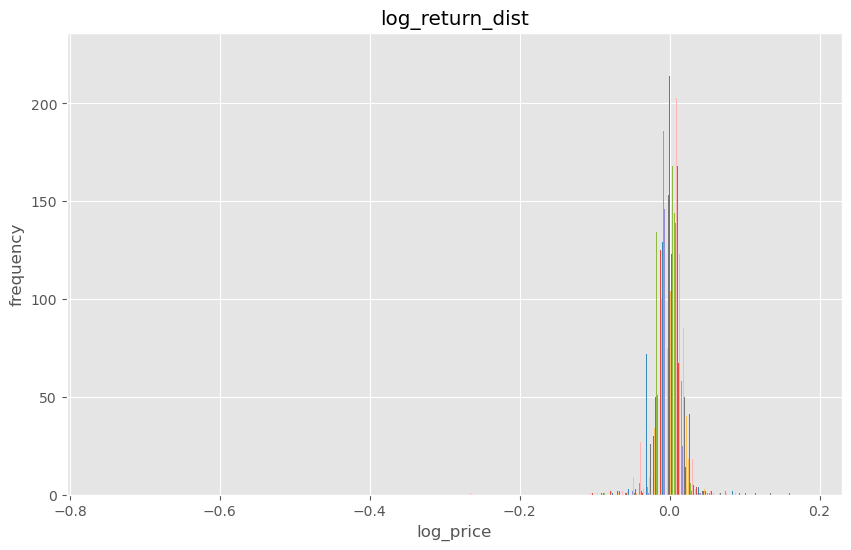

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(np.array(log_ret.T), bins=100)
plt.xlabel('log_price')
plt.ylabel('frequency')
plt.title('log_return_dist')
plt.show()

In [18]:
def corr_coef(x, y):
    from math import sqrt
    try:
        n = len(x[0])
    except TypeError:
        n = len(x)

    prod = []
    for i in y:
        prod.append((np.array(i) * np.array(x[0])).tolist())

    sum_prod = []
    sum_prod = sum(np.array(prod).T).tolist()
    
    n_sum_prod = []
    for i in sum_prod:
        n_sum_prod.append(n * i)
    
    try:
        sum_x = sum(x[0])
    except TypeError:
        sum_x = sum(x)

    sum_y = []
    for i in y:
        sum_y.append(sum(i))

    prod_sumx_sumy = (sum_x * np.array(sum_y)).tolist()

    numerator = (np.array(n_sum_prod) - np.array(prod_sumx_sumy)).tolist()

    squared_sum_x = sum_x ** 2

    squared_sum_y = (np.array(sum_y) ** 2).tolist()
    # print('(sum_y)^2 =', squared_sum_y)

    x_square = []
    try:
        for xi in x[0]:
            x_square.append(xi ** 2)
    except TypeError:
        for x in x:
            x_square.append(x ** 2)

    x_square_sum = sum(x_square)

    y_square = []
    for yi in y:
        y_square.append((np.array(yi) ** 2).tolist())

    y_square_sum = []
    for i in y_square:
        y_square_sum.append(sum(np.array(i)))

    denominator1 = sqrt(n * x_square_sum  - squared_sum_x)

    denominator2 = (np.sqrt(n * np.array(y_square_sum) - np.array(squared_sum_y))).tolist()

    # SP 500 price and constituents price correlation coefficient
    corr_coef = (np.array(numerator) / (np.array(denominator1) * np.array(denominator2))).tolist()

    # Error of numpy correlation coefficient
    error = (np.array(corr_coef) - np.array(corr_coef_np)) / np.array(corr_coef_np)
    
    return corr_coef, error

# Correlation of Firms

In [19]:
close_price

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2024-04-01,145.559998,15.41,170.029999,180.759995,163.369995,112.089996,92.309998,339.170013,502.089996,196.619995,...,273.440002,35.560001,106.559998,53.279999,116.989998,128.639999,140.470001,129.750000,301.000000,167.020004
2024-04-02,144.169998,14.40,168.839996,180.690002,160.110001,112.019997,91.489998,336.459991,499.209991,194.880005,...,267.809998,35.430000,105.260002,54.080002,119.279999,128.119995,140.710007,128.470001,296.500000,165.009995
2024-04-03,143.729996,14.16,169.649994,177.330002,159.339996,111.279999,92.230003,332.279999,497.010010,195.360001,...,269.299988,34.939999,106.419998,54.090000,119.300003,128.860001,139.009995,130.009995,292.750000,162.970001
2024-04-04,141.339996,13.83,168.820007,167.899994,158.839996,110.110001,91.089996,330.470001,487.109985,191.949997,...,266.320007,34.639999,106.120003,53.770000,119.720001,127.250000,136.279999,127.559998,292.959991,165.520004
2024-04-05,144.119995,13.76,169.580002,170.000000,161.770004,111.199997,94.900002,333.000000,485.119995,194.759995,...,270.940002,34.590000,107.459999,53.529999,121.370003,128.270004,136.100006,127.330002,290.380005,165.860001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,135.080002,11.16,208.139999,172.740005,148.389999,105.300003,102.430000,307.209991,524.169983,228.460007,...,266.440002,29.040001,89.099998,53.980000,114.050003,138.339996,133.990005,108.459999,306.709991,171.839996
2024-06-25,134.690002,11.13,209.070007,170.750000,150.910004,105.489998,102.150002,307.170013,526.880005,230.339996,...,263.070007,28.280001,88.300003,53.740002,114.370003,136.929993,132.330002,108.220001,306.040009,167.979996
2024-06-26,133.089996,11.12,213.250000,171.149994,150.000000,104.879997,99.769997,304.619995,528.659973,227.839996,...,263.649994,27.959999,88.129997,53.790001,114.410004,136.210007,131.960007,108.110001,307.119995,170.899994


In [20]:
corr_a = []
for i in close_prices:
    corr_a.append(np.corrcoef(close_prices[0], i)[0, 1])
corr_a

[1.0,
 0.7322398076770772,
 -0.3186219668932245,
 -0.2363803027311755,
 -0.06065831915652889,
 0.11138137069097599,
 -0.012971614231595173,
 0.4168557987105276,
 -0.029567699124574503,
 -0.20299406490900804,
 0.2442549717775037,
 0.49754337595367526,
 0.013416902844635136,
 0.4832761728686784,
 0.31944805484712324,
 0.3101314121655244,
 -0.14376837523574734,
 0.6325741026973156,
 0.39467133570390794,
 -0.06848589043568251,
 0.3499050138168537,
 0.7195079103845059,
 0.265868017882195,
 0.43812598153337357,
 0.5590221904049707,
 -0.24674760295083997,
 0.1602482531062859,
 0.22966656325513107,
 0.10923496388981165,
 0.09639056877741355,
 0.31960120033071776,
 -0.0457327103384921,
 0.05641889488150594,
 0.06200234318097142,
 0.45601370901381105,
 0.039372979615463086,
 0.5222984684092217,
 0.3194307971503857,
 -0.22883265774765912,
 -0.07036081387700714,
 0.5016288245018973,
 0.7426110985084865,
 0.14491917107919616,
 -0.15888788275445206,
 -0.2907164632540762,
 0.11793371436095698,
 0.169

In [21]:
np.corrcoef(close_price['A'], close_price['AAPL'])[0, 1]

-0.3186219668932245

In [22]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

tables = pd.read_html(url)

sectors = []
for i in tables[0]['GICS Sector']:
    sectors.append(i)

sectors
# np.unique(np.array(sectors))
# tables[0]['GICS Sub-Industry']

['Industrials',
 'Industrials',
 'Health Care',
 'Health Care',
 'Information Technology',
 'Information Technology',
 'Information Technology',
 'Utilities',
 'Financials',
 'Health Care',
 'Materials',
 'Consumer Discretionary',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Health Care',
 'Industrials',
 'Utilities',
 'Financials',
 'Communication Services',
 'Communication Services',
 'Consumer Staples',
 'Consumer Discretionary',
 'Materials',
 'Utilities',
 'Industrials',
 'Utilities',
 'Financials',
 'Financials',
 'Real Estate',
 'Utilities',
 'Financials',
 'Industrials',
 'Health Care',
 'Information Technology',
 'Information Technology',
 'Information Technology',
 'Financials',
 'Energy',
 'Information Technology',
 'Information Technology',
 'Consumer Discretionary',
 'Financials',
 'Consumer Staples',
 'Information Technology',
 'Financials',
 'Financials',
 'Communication Services',
 'Utilities',
 'Information Technology',
 'Industrials',
 'Consumer Discreti

# Y

In [23]:
close_price_list = np.array(close_price).T.tolist()
# print(close_price_list)
close_price

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2024-04-01,145.559998,15.41,170.029999,180.759995,163.369995,112.089996,92.309998,339.170013,502.089996,196.619995,...,273.440002,35.560001,106.559998,53.279999,116.989998,128.639999,140.470001,129.750000,301.000000,167.020004
2024-04-02,144.169998,14.40,168.839996,180.690002,160.110001,112.019997,91.489998,336.459991,499.209991,194.880005,...,267.809998,35.430000,105.260002,54.080002,119.279999,128.119995,140.710007,128.470001,296.500000,165.009995
2024-04-03,143.729996,14.16,169.649994,177.330002,159.339996,111.279999,92.230003,332.279999,497.010010,195.360001,...,269.299988,34.939999,106.419998,54.090000,119.300003,128.860001,139.009995,130.009995,292.750000,162.970001
2024-04-04,141.339996,13.83,168.820007,167.899994,158.839996,110.110001,91.089996,330.470001,487.109985,191.949997,...,266.320007,34.639999,106.120003,53.770000,119.720001,127.250000,136.279999,127.559998,292.959991,165.520004
2024-04-05,144.119995,13.76,169.580002,170.000000,161.770004,111.199997,94.900002,333.000000,485.119995,194.759995,...,270.940002,34.590000,107.459999,53.529999,121.370003,128.270004,136.100006,127.330002,290.380005,165.860001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,135.080002,11.16,208.139999,172.740005,148.389999,105.300003,102.430000,307.209991,524.169983,228.460007,...,266.440002,29.040001,89.099998,53.980000,114.050003,138.339996,133.990005,108.459999,306.709991,171.839996
2024-06-25,134.690002,11.13,209.070007,170.750000,150.910004,105.489998,102.150002,307.170013,526.880005,230.339996,...,263.070007,28.280001,88.300003,53.740002,114.370003,136.929993,132.330002,108.220001,306.040009,167.979996
2024-06-26,133.089996,11.12,213.250000,171.149994,150.000000,104.879997,99.769997,304.619995,528.659973,227.839996,...,263.649994,27.959999,88.129997,53.790001,114.410004,136.210007,131.960007,108.110001,307.119995,170.899994


# Parameters
Gold Price, Crude Oil Price, 10-year Treasury Yield, Stock Volume  
Volatility Index (VIX), Puchase Manager Index (PMI)  
More economic indicator (either lagging or leading)  

In [24]:
params_ticker = ['^TNX', 'CL=F', 'GC=F', 'GCZ25.CMX', '^VIX', 'DX-Y.NYB', 'XLRE', 'REM', 'VNQ', 'PSR', 'REET',
                 'NURE', 'SRET']
param_list = yf.download(params_ticker, start=n_years, end=today)['Close']
param_list.columns = ['risk_free', 'criude_oil', 'gold', 'gold_dec', 'vix', 'usd', 'XLRE', 'REM', 'VNQ', 'PSR',
                      'REET','NURE', 'SRET']

param_list

[*********************100%%**********************]  13 of 13 completed


,risk_free,criude_oil,gold,gold_dec,vix,usd,XLRE,REM,VNQ,PSR,REET,NURE,SRET
Date,,,,,,,,,,,,,
2024-04-01,83.709999,105.019997,2236.500000,2422.300049,30.207001,86.629997,23.360001,22.910000,20.290001,85.029999,38.840000,4.329,13.650000
2024-04-02,85.150002,104.820000,2261.000000,2449.899902,29.809999,85.459999,23.059999,22.600000,20.049999,83.959999,38.410000,4.365,14.610000
2024-04-03,85.430000,104.250000,2294.399902,2484.399902,29.820000,85.500000,23.059999,22.660000,19.850000,84.050003,38.430000,4.355,14.330000
2024-04-04,86.589996,104.120003,2288.800049,2479.199951,29.770000,84.940002,22.950001,22.549999,19.820000,83.510002,38.130001,4.309,16.350000
2024-04-05,86.910004,104.300003,2325.699951,2518.000000,29.930000,85.500000,23.070000,22.549999,19.940001,83.940002,38.380001,4.378,16.030001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,81.629997,105.470001,2330.000000,2507.100098,31.330000,85.540001,23.280001,22.379999,19.910000,84.620003,38.349998,4.248,13.330000
2024-06-25,80.830002,105.610001,2316.600098,2493.600098,30.986000,84.300003,22.990000,22.180000,19.790001,83.580002,37.810001,4.238,12.840000
2024-06-26,80.900002,106.050003,2299.199951,2475.800049,30.778999,84.099998,22.920000,22.150000,19.750000,83.320000,37.759998,4.316,12.550000


In [25]:
# Stock Volume
volume = data_d['Volume'].dropna(axis=1).replace(0, 1)
volume_t = pd.DataFrame(volume)
volume_list = np.array(volume.T).tolist()
volume_array = np.array(volume.T)
print(volume_t)

Ticker            A       AAL      AAPL      ABBV     ABNB      ABT     ACGL  \
Date                                                                           
2024-04-01   968300  23249600  46240500   3502100  2496300  3964000  1361200   
2024-04-02  1376500  34155400  49329500   4523800  4000900  4560700  1674900   
2024-04-03  1211200  33357700  47691700   5893000  2288100  4409900  1451400   
2024-04-04  1183900  47483600  53704400  10539000  3539700  4799700  1466400   
2024-04-05  1655800  30612400  42055200   7029700  2225600  5590300  2591400   
...             ...       ...       ...       ...      ...      ...      ...   
2024-06-24  3339500  25666400  80727000   6249900  4530900  5201300  1431000   
2024-06-25  2310800  28547300  56713900   5712700  5008300  4722600   879700   
2024-06-26  1836800  39848700  66213200   5576100  3797900  5406600  1370600   
2024-06-27  1898000  23780800  49772700   5382000  3588600  4137600  1227600   
2024-06-28  9817600  28068000  82475600 

In [26]:
# CPI


In [27]:
# 10-year Treasury Bond Yield
risk_free = yf.download('^TNX', start=n_years, end=today)['Close']
risk_free_t = risk_free
risk_free_list = risk_free.loc[n_years:today].tolist()
risk_free_array = np.array(risk_free)

print(risk_free_t)

[*********************100%%**********************]  1 of 1 completed

Date
2024-04-01    4.329
2024-04-02    4.365
2024-04-03    4.355
2024-04-04    4.309
2024-04-05    4.378
              ...  
2024-06-24    4.248
2024-06-25    4.238
2024-06-26    4.316
2024-06-27    4.288
2024-06-28    4.343
Name: Close, Length: 63, dtype: float64


In [28]:
# Crude Oil Price
crude_oil = pd.DataFrame(yf.download('CL=F', start=n_years, end=today)['Close'])
crude_oil_t = crude_oil
crude_oil_list = list(itertools.chain(*np.array(crude_oil).tolist()))
crude_oil_array = np.array(crude_oil_t)

print(crude_oil_t)

# On April 20, 2020, Crude Oil Price is negative
# for i in crude_oil_list:
#     if i < 0:
#         print(i)

# crude_oil_t.index[crude_oil_t['close price'] == -37.630001068115234].tolist()
# .drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234])

[*********************100%%**********************]  1 of 1 completed

                Close
Date                 
2024-04-01  83.709999
2024-04-02  85.150002
2024-04-03  85.430000
2024-04-04  86.589996
2024-04-05  86.910004
...               ...
2024-06-24  81.629997
2024-06-25  80.830002
2024-06-26  80.900002
2024-06-27  81.739998
2024-06-28  81.540001

[63 rows x 1 columns]


In [29]:
# Gold Future August
gold = yf.download('GC=F', start=n_years, end=today)['Close']
gold_t = gold
gold_list = gold.tolist()
gold_array = np.array(gold.T)

print(gold_t)

[*********************100%%**********************]  1 of 1 completed

Date
2024-04-01    2236.500000
2024-04-02    2261.000000
2024-04-03    2294.399902
2024-04-04    2288.800049
2024-04-05    2325.699951
                 ...     
2024-06-24    2330.000000
2024-06-25    2316.600098
2024-06-26    2299.199951
2024-06-27    2324.500000
2024-06-28    2327.699951
Name: Close, Length: 63, dtype: float64


In [30]:
# Gold Future December
gold_future = yf.download('GCZ25.CMX', start=n_years, end=today)['Close']
gold_future

[*********************100%%**********************]  1 of 1 completed


Date
2024-04-01    2422.300049
2024-04-02    2449.899902
2024-04-03    2484.399902
2024-04-04    2479.199951
2024-04-05    2518.000000
                 ...     
2024-06-24    2507.100098
2024-06-25    2493.600098
2024-06-26    2475.800049
2024-06-27    2499.000000
2024-06-28    2502.399902
Name: Close, Length: 63, dtype: float64

In [31]:
# Volatility Index
vix = yf.download('^VIX', start=n_years, end=today)['Close']
vix_t = vix
vix_list = vix.tolist()
vix_array = np.array(vix.T)

print(vix_t)

[*********************100%%**********************]  1 of 1 completed

Date
2024-04-01    13.650000
2024-04-02    14.610000
2024-04-03    14.330000
2024-04-04    16.350000
2024-04-05    16.030001
                ...    
2024-06-24    13.330000
2024-06-25    12.840000
2024-06-26    12.550000
2024-06-27    12.240000
2024-06-28    12.440000
Name: Close, Length: 63, dtype: float64


In [32]:
# USD
usd = yf.download('DX-Y.NYB', start=n_years, end=today)['Close']
usd_t = usd
usd_list = usd.tolist()
usd_array = np.array(usd.T)

print(usd_t)

[*********************100%%**********************]  1 of 1 completed

Date
2024-04-01    105.019997
2024-04-02    104.820000
2024-04-03    104.250000
2024-04-04    104.120003
2024-04-05    104.300003
                 ...    
2024-06-24    105.470001
2024-06-25    105.610001
2024-06-26    106.050003
2024-06-27    105.910004
2024-06-28    105.870003
Name: Close, Length: 63, dtype: float64


In [33]:
# REITs
reits_tickers = ['XLRE', 'REM', 'VNQ', 'PSR', 'REET', 'NURE', 'SRET']
reits_list = []
# for i in reits:
reits = yf.download(reits_tickers, start=n_years, end=today)['Close']
print(reits)

[*********************100%%**********************]  7 of 7 completed

Ticker           NURE        PSR       REET        REM       SRET        VNQ  \
Date                                                                           
2024-04-01  30.207001  86.629997  23.360001  22.910000  20.290001  85.029999   
2024-04-02  29.809999  85.459999  23.059999  22.600000  20.049999  83.959999   
2024-04-03  29.820000  85.500000  23.059999  22.660000  19.850000  84.050003   
2024-04-04  29.770000  84.940002  22.950001  22.549999  19.820000  83.510002   
2024-04-05  29.930000  85.500000  23.070000  22.549999  19.940001  83.940002   
...               ...        ...        ...        ...        ...        ...   
2024-06-24  31.330000  85.540001  23.280001  22.379999  19.910000  84.620003   
2024-06-25  30.986000  84.300003  22.990000  22.180000  19.790001  83.580002   
2024-06-26  30.778999  84.099998  22.920000  22.150000  19.750000  83.320000   
2024-06-27  30.740000  84.669998  23.059999  21.959999  19.709999  84.129997   
2024-06-28  31.093000  85.610001  23.250

In [34]:
# Major Importing Nation GDP, PPI


In [35]:
# Correlatioin with volume
volume_corrcoef = []
for i in range(len(close_price_list)):
    cp = close_price_list[i]
    v = volume_list[i]
    corr_matrix = np.corrcoef(cp, v)
    corr = corr_matrix[0, 1]
    volume_corrcoef.append(corr)
# print(volume_corrcoef)

In [36]:
np.corrcoef(pd.DataFrame(close_price).loc[:, 'A'], volume_t.loc[:, 'A'])

array([[ 1.        , -0.48808065],
       [-0.48808065,  1.        ]])

# Estimation of Log Data

In [37]:
close_price_y = pd.DataFrame(np.log(close_price.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234]))['A'])
risk_free_param = np.log(risk_free_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234]))
gold_param = np.log(gold_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234]))
crude_oil_param = np.array(np.log(crude_oil_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234])))
vix_param = np.log(vix_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234]))

# Remove inner list in crude_oil_param
crude_oil_param = list(itertools.chain(*crude_oil_param))

In [38]:
param = pd.DataFrame({'Ten Year Treasury': risk_free_param,
                      'Crude Oil': crude_oil_param,
                      'Gold': gold_param,
                      'VIX': vix_param})

param = param.reindex(close_price.index)

param

,Ten Year Treasury,Crude Oil,Gold,VIX
date,,,,
2024-04-01,1.465337,4.427358,7.712667,2.613739
2024-04-02,1.473618,4.444414,7.723562,2.681706
2024-04-03,1.471325,4.447697,7.738227,2.662355
2024-04-04,1.460706,4.461184,7.735783,2.794228
2024-04-05,1.476592,4.464873,7.751776,2.774462
...,...,...,...,...
2024-06-24,1.446448,4.402197,7.753624,2.590017
2024-06-25,1.444091,4.392348,7.747856,2.552565
2024-06-26,1.462329,4.393214,7.740316,2.529721


In [39]:
file_name = 'param.xlsx'
param.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [40]:
y = close_price_y
y

,A
date,
2024-04-01,4.980588
2024-04-02,4.970993
2024-04-03,4.967937
2024-04-04,4.951168
2024-04-05,4.970646
...,...
2024-06-24,4.905867
2024-06-25,4.902976
2024-06-26,4.891026


In [41]:
x = param
x

,Ten Year Treasury,Crude Oil,Gold,VIX
date,,,,
2024-04-01,1.465337,4.427358,7.712667,2.613739
2024-04-02,1.473618,4.444414,7.723562,2.681706
2024-04-03,1.471325,4.447697,7.738227,2.662355
2024-04-04,1.460706,4.461184,7.735783,2.794228
2024-04-05,1.476592,4.464873,7.751776,2.774462
...,...,...,...,...
2024-06-24,1.446448,4.402197,7.753624,2.590017
2024-06-25,1.444091,4.392348,7.747856,2.552565
2024-06-26,1.462329,4.393214,7.740316,2.529721


In [42]:
# Eliminate data points that does not match
x = x.reindex(y.index)

print(x)

            Ten Year Treasury  Crude Oil      Gold       VIX
date                                                        
2024-04-01           1.465337   4.427358  7.712667  2.613739
2024-04-02           1.473618   4.444414  7.723562  2.681706
2024-04-03           1.471325   4.447697  7.738227  2.662355
2024-04-04           1.460706   4.461184  7.735783  2.794228
2024-04-05           1.476592   4.464873  7.751776  2.774462
...                       ...        ...       ...       ...
2024-06-24           1.446448   4.402197  7.753624  2.590017
2024-06-25           1.444091   4.392348  7.747856  2.552565
2024-06-26           1.462329   4.393214  7.740316  2.529721
2024-06-27           1.455820   4.403543  7.751260  2.504709
2024-06-28           1.468565   4.401094  7.752636  2.520917

[63 rows x 4 columns]


# Correlation of y and x

In [43]:
for i in x.columns:
    print(np.corrcoef(y.values.ravel(), x.loc[:, i].values.ravel())[0, 1])

0.14788170963870334
0.11712650367941024
0.3407917139538324
-0.12988926572826964


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import f_regression

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Training Data

In [46]:
lr = LinearRegression()
lr.fit(x_train, y_train)

beta_null_train = lr.intercept_
print(beta_null_train)

beta_1_train = lr.coef_
print(beta_1_train)

y_pred_train = lr.predict(x_train).flatten()
# print(y_pred_train)

[-7.06865792]
[[ 1.25300397  0.58858706  1.11749604 -0.42275098]]


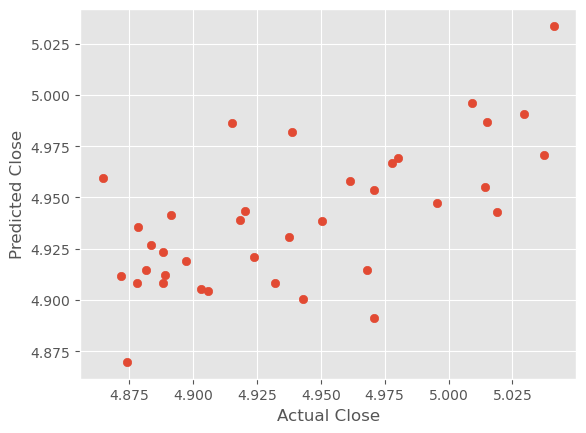

In [47]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()

In [48]:
print(r2_score(y_train, y_pred_train))
print(f_regression(x_train, y_train.values.ravel())[1])
print(mean_squared_error(y_train, y_pred_train))

0.4100568756695666
[0.26170212 0.96755576 0.07198439 0.26800141]
0.0016682350680298518


# Testing Data

In [49]:
lr = LinearRegression()
lr.fit(x_test, y_test)
beta_null_test = lr.intercept_
print(beta_null_test)

beta_1_test = lr.coef_
print(beta_1_test)

y_pred_test = lr.predict(x_test).flatten()
# print(y_pred_test)

[-10.62387438]
[[ 0.40178594  1.0515304   1.4368652  -0.30598298]]


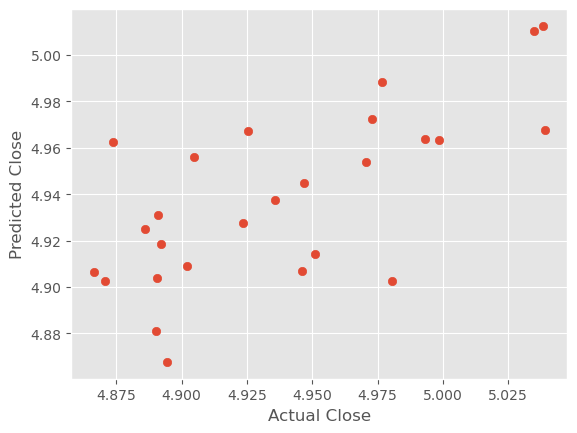

In [50]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()

In [51]:
print(r2_score(y_test, y_pred_test))
print(f_regression(x_test, y_test.values.ravel())[1])
print(mean_squared_error(y_test, y_pred_test))

0.4792696495545351
[0.67404961 0.1445436  0.04490944 0.80256291]
0.0014479743991966303


# Estimation of Non-log Data

In [52]:
close_price_y1 = pd.DataFrame(close_price.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234])['A'])
risk_free_param1 = risk_free_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234])
gold_param1 = gold_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234])
crude_oil_param1 = np.array(crude_oil_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234]))
vix_param1 = vix_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234])

# Remove inner list in crude_oil_param
crude_oil_param1 = list(itertools.chain(*crude_oil_param1))

In [53]:
param1 = pd.DataFrame({'Ten Year Treasury': risk_free_param1,
                      'Crude Oil': crude_oil_param1,
                      'Gold': gold_param1,
                      'VIX': vix_param1})
param1

,Ten Year Treasury,Crude Oil,Gold,VIX
Date,,,,
2024-04-01,4.329,83.709999,2236.500000,13.650000
2024-04-02,4.365,85.150002,2261.000000,14.610000
2024-04-03,4.355,85.430000,2294.399902,14.330000
2024-04-04,4.309,86.589996,2288.800049,16.350000
2024-04-05,4.378,86.910004,2325.699951,16.030001
...,...,...,...,...
2024-06-24,4.248,81.629997,2330.000000,13.330000
2024-06-25,4.238,80.830002,2316.600098,12.840000
2024-06-26,4.316,80.900002,2299.199951,12.550000


In [54]:
y1 = close_price_y1
x1 = param1

In [55]:
# Eliminate data points that does not match
x1 = x1.reindex(y1.index)

print(x1)

            Ten Year Treasury  Crude Oil         Gold        VIX
date                                                            
2024-04-01              4.329  83.709999  2236.500000  13.650000
2024-04-02              4.365  85.150002  2261.000000  14.610000
2024-04-03              4.355  85.430000  2294.399902  14.330000
2024-04-04              4.309  86.589996  2288.800049  16.350000
2024-04-05              4.378  86.910004  2325.699951  16.030001
...                       ...        ...          ...        ...
2024-06-24              4.248  81.629997  2330.000000  13.330000
2024-06-25              4.238  80.830002  2316.600098  12.840000
2024-06-26              4.316  80.900002  2299.199951  12.550000
2024-06-27              4.288  81.739998  2324.500000  12.240000
2024-06-28              4.343  81.540001  2327.699951  12.440000

[63 rows x 4 columns]


In [56]:
for i in x1.columns:
    print(np.corrcoef(y1.values.ravel(), x1.loc[:, i].values.ravel())[0, 1])

0.13108742797943607
0.1027494378360435
0.356102875892708
-0.1446559436488913


In [57]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.4, random_state=42)

# Training Data

In [58]:
lr = LinearRegression()
lr.fit(x_train1, y_train1)
beta_null_train_nl = lr.intercept_
print(beta_null_train_nl)

beta_1_train_nl = lr.coef_
print(beta_1_train_nl)

y_pred_train1 = lr.predict(x_train1).flatten()
# print(y_pred_train1)

[-240.52223027]
[[37.68669946  1.0261756   0.07941928 -3.96186747]]


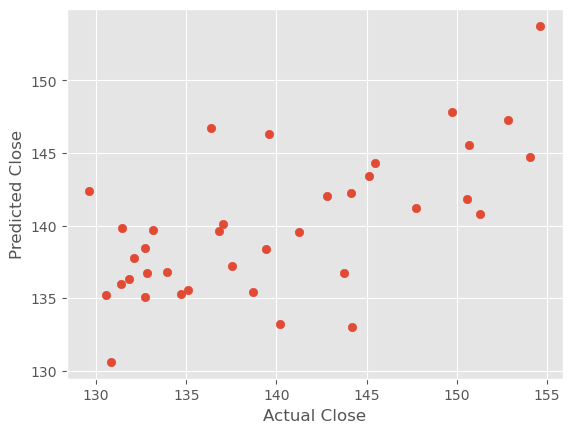

In [59]:
plt.scatter(y_train1, y_pred_train1)
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()

In [60]:
print(r2_score(y_train1, y_pred_train1))
print(f_regression(x_train1, y_train1.values.ravel())[1])
print(mean_squared_error(y_train1, y_pred_train1))

0.41299203898547965
[0.31188519 0.89852394 0.05943022 0.24593996]
33.173639250974745


# Testing Data

In [61]:
lr = LinearRegression()
lr.fit(x_test1, y_test1)
beta_null_test_nl = lr.intercept_
print(beta_null_test_nl)

beta_1_test_nl = lr.coef_
print(beta_1_test_nl)

y_pred_test1 = lr.predict(x_test1).flatten()
# print(y_pred_train1)

[-244.03957888]
[[11.97548664  1.82257862  0.09611265 -3.00814805]]


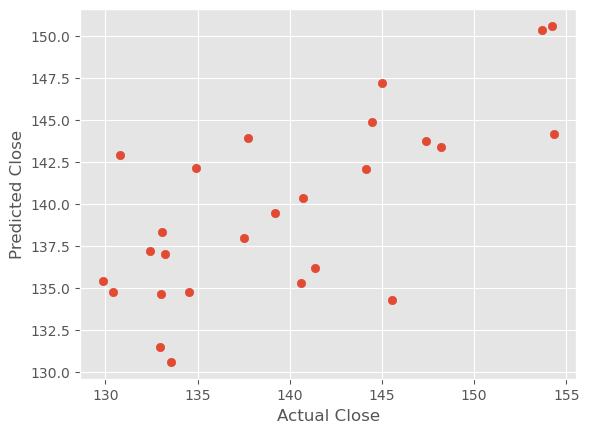

In [62]:
plt.scatter(y_test1, y_pred_test1)
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()

In [63]:
print(r2_score(y_test1, y_pred_test1))
print(f_regression(x_test1, y_test1.values.ravel())[1])
print(mean_squared_error(y_test1, y_pred_test1))

0.5031148747717435
[0.72730216 0.1688044  0.03536031 0.72410504]
27.654508742588025


# Automated Regression

In [64]:
close_price_log = np.log(close_price).dropna()
param_log = np.log(param_list.dropna())
print(close_price_log)
print(param_list)

Ticker             A       AAL      AAPL      ABBV      ABNB       ABT  \
date                                                                     
2024-04-01  4.980588  2.735017  5.135975  5.197170  5.096018  4.719302   
2024-04-02  4.970993  2.667228  5.128951  5.196783  5.075861  4.718677   
2024-04-03  4.967937  2.650421  5.133737  5.178012  5.071040  4.712050   
2024-04-04  4.951168  2.626840  5.128833  5.123369  5.067897  4.701480   
2024-04-05  4.970646  2.621766  5.133325  5.135798  5.086176  4.711330   
...              ...       ...       ...       ...       ...       ...   
2024-06-24  4.905867  2.412336  5.338211  5.151788  4.999844  4.656813   
2024-06-25  4.902976  2.409644  5.342669  5.140200  5.016684  4.658616   
2024-06-26  4.891026  2.408745  5.362465  5.142540  5.010635  4.652817   
2024-06-27  4.873669  2.423031  5.366443  5.129840  5.021311  4.650621   
2024-06-28  4.864684  2.427454  5.350056  5.144700  5.021443  4.643525   

Ticker          ACGL       ACN      A

In [71]:
def regression(ticker, param, test_size, random_state):
    y_auto = close_price_log[ticker]
    x_auto = param
    x_train_au, x_test_au, y_train_au, y_test_au = train_test_split(x_auto, y_auto, 
                                                                    test_size=test_size, 
                                                                    random_state=random_state)
    lr = LinearRegression()
    lr.fit(x_train_au, y_train_au)
    beta_null_train_au = lr.intercept_
    beta_1_train_au = lr.coef_
    y_pred_train_au = lr.predict(x_train_au).flatten()
    
    r_squared = r2_score(y_train_au, y_pred_train_au)
    p = f_regression(x_train_au, y_train_au.values.ravel())[1]
    mse = mean_squared_error(y_train_au, y_pred_train_au)
    
    return x_auto, y_auto, beta_null_train_au, beta_1_train_au, y_pred_train_au, r_squared, p, mse

In [72]:
def regression_results(ticker, param, test_size, random_state):
    y_auto = close_price_log[ticker]
    x_auto = param_list
    x_train_au, x_test_au, y_train_au, y_test_au = train_test_split(x_auto, y_auto, 
                                                                    test_size=test_size, 
                                                                    random_state=random_state)
    lr = LinearRegression()
    lr.fit(x_train_au, y_train_au)
    beta_null_train_au = lr.intercept_
    beta_1_train_au = lr.coef_
    y_pred_train_au = lr.predict(x_train_au).flatten()
    
    r_squared = r2_score(y_train_au, y_pred_train_au)
    p = f_regression(x_train_au, y_train_au.values.ravel())[1]
    mse = mean_squared_error(y_train_au, y_pred_train_au)
    
    print(f'Intercept of regression : {beta_null_train_au}')
    print(f'Slope of regression: {beta_1_train_au}')
    print(f'R-Squared of regression: {r_squared}')
    print(f'p-value of regression: {p}')
    print(f'Mean Squared Error: {mse}')

In [73]:
regression('A', param_list, 0.4, 42)

(            risk_free  criude_oil         gold     gold_dec        vix  \
 Date                                                                     
 2024-04-01  83.709999  105.019997  2236.500000  2422.300049  30.207001   
 2024-04-02  85.150002  104.820000  2261.000000  2449.899902  29.809999   
 2024-04-03  85.430000  104.250000  2294.399902  2484.399902  29.820000   
 2024-04-04  86.589996  104.120003  2288.800049  2479.199951  29.770000   
 2024-04-05  86.910004  104.300003  2325.699951  2518.000000  29.930000   
 ...               ...         ...          ...          ...        ...   
 2024-06-24  81.629997  105.470001  2330.000000  2507.100098  31.330000   
 2024-06-25  80.830002  105.610001  2316.600098  2493.600098  30.986000   
 2024-06-26  80.900002  106.050003  2299.199951  2475.800049  30.778999   
 2024-06-27  81.739998  105.910004  2324.500000  2499.000000  30.740000   
 2024-06-28  81.540001  105.870003  2327.699951  2502.399902  31.093000   
 
                   usd 

In [74]:
regression_results('A', param_list, 0.4, 42)

Intercept of regression : -2.9741173415717794
Slope of regression: [ 0.0084302   0.05435132 -0.00785617  0.00793058 -0.07080288  0.08126585
 -0.06580051 -0.0228413   0.09847147  0.05474144 -0.22138773 -0.08854668
 -0.0415739 ]
R-Squared of regression: 0.8288347266467067
p-value of regression: [0.9481155  0.21430754 0.06946335 0.03224817 0.8425646  0.32617335
 0.18112964 0.00156827 0.00285595 0.39509493 0.46158481 0.28272602
 0.27380662]
Mean Squared Error: 0.00048401939044710897


In [77]:
x_train_au, x_test_au, y_train_au, y_test_au = train_test_split(x_auto, y_auto, test_size=0.4, random_state=42)

NameError: name 'x_auto' is not defined

In [78]:
lr = LinearRegression()
lr.fit(x_train_au, y_train_au)
beta_null_train_au = lr.intercept_
print(beta_null_train_au)

beta_1_train_au = lr.coef_
print(beta_1_train_au)

y_pred_train_au = lr.predict(x_train_au).flatten()
# print(y_pred_train_au)

NameError: name 'x_train_au' is not defined

In [79]:
plt.scatter(y_train_au, y_pred_train_au)
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()

NameError: name 'y_train_au' is not defined

In [80]:
print(r2_score(y_train_au, y_pred_train_au))
print(f_regression(x_train_au, y_train_au.values.ravel())[1])
print(mean_squared_error(y_train_au, y_pred_train_au))

NameError: name 'y_train_au' is not defined